## Exercício Redes Neurais Artificiais

Instruções:
Treinar uma Rede Neural Artificial do tipo Perceptron Multilayer para predizer os dados se um determinado paciente está doente ou não, com base em sintomas associados à doenças do coração.

Para tanto, a base de dados disponível no seguinte repositório deverá ser utilizada:  Heart_disease_statlog.csv.

O exercício deve ser entregue com o código fonte em Python utilizado para treinamento e teste da rede, bem como com as informações dos melhores hiperparêmetros utilizados e as métricas de desempenho obtidas. Os gráficos contendo as curvas de aprendizado também deverão ser disponibilizados.

    Na elaboração do exercício, atentar para:
    1. a necessidade de separar o conjunto de dados entre treinamento, validação e testes.
    2. normalizar os dados de entrada, sempre que julgar necessário.

### Importações e carregamento de dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Carregar o CSV
df = pd.read_csv('Heart_disease_statlog.csv')
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\nInformações gerais do dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())


Primeiras 5 linhas do dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   3       130   322    0        2      109      0      2.4      1   
1   67    0   2       115   564    0        2      160      0      1.6      1   
2   57    1   1       124   261    0        0      141      0      0.3      0   
3   64    1   3       128   263    0        0      105      1      0.2      1   
4   74    0   1       120   269    0        2      121      1      0.2      0   

   ca  thal  target  
0   3     1       1  
1   0     3       0  
2   0     3       1  
3   1     3       0  
4   1     1       0  

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270

### Verifica nulos e distribui classes

Verificação de valores nulos:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Shape do dataset: (270, 14)
Número de features: 13


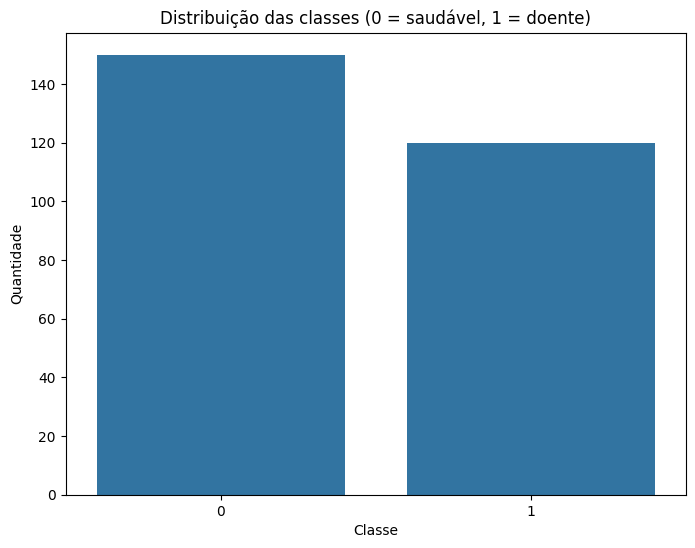


Distribuição das classes:
target
0    150
1    120
Name: count, dtype: int64


In [5]:
print("Verificação de valores nulos:")
print(df.isnull().sum())

print(f"\nShape do dataset: {df.shape}")
print(f"Número de features: {df.shape[1] - 1}")

# Visualizar distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title("Distribuição das classes (0 = saudável, 1 = doente)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

print(f"\nDistribuição das classes:")
print(df['target'].value_counts())


### Separação de dados

In [6]:
# Features e alvo
X = df.drop('target', axis=1)
y = df['target']

print(f"Shape das features: {X.shape}")
print(f"Shape do target: {y.shape}")

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/validação/teste: 60% treino, 20% validação, 20% teste
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 * 0.8 = 0.2

print(f"\nDivisão dos dados:")
print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(df)*100:.1f}%)")


Shape das features: (270, 13)
Shape do target: (270,)

Divisão dos dados:
Treino: 162 amostras (60.0%)
Validação: 54 amostras (20.0%)
Teste: 54 amostras (20.0%)


## Treinamento

In [7]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # pode testar (50,), (100,50), etc.
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

print("Iniciando treinamento da rede neural...")
mlp.fit(X_train, y_train)
print(f"Treinamento concluído em {mlp.n_iter_} iterações")


Iniciando treinamento da rede neural...
Treinamento concluído em 27 iterações


### Curvas de aprendizado

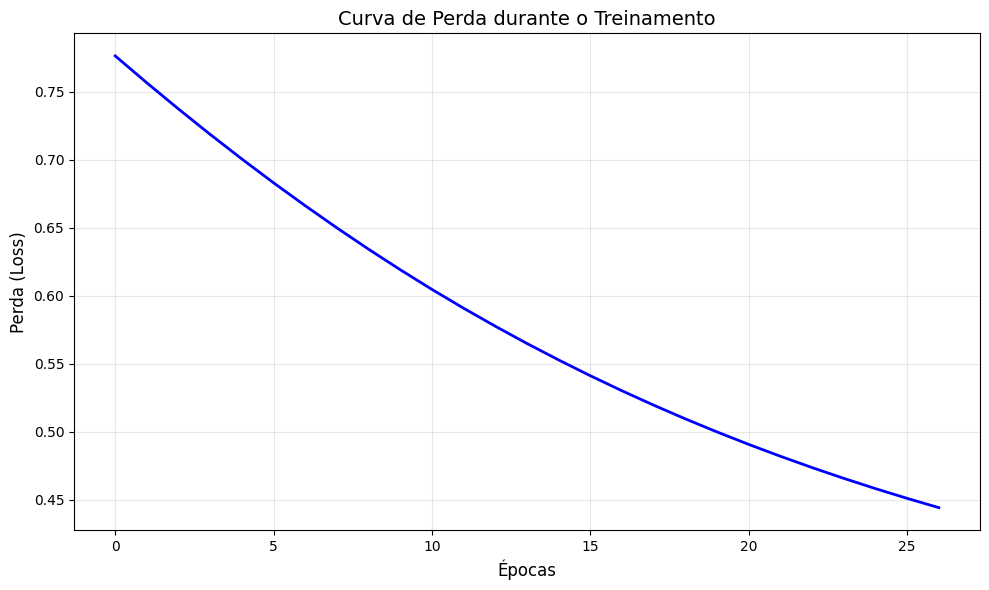

Perda final: 0.444293
Número de iterações: 27


In [8]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, 'b-', linewidth=2)
plt.title("Curva de Perda durante o Treinamento", fontsize=14)
plt.xlabel("Épocas", fontsize=12)
plt.ylabel("Perda (Loss)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Perda final: {mlp.loss_curve_[-1]:.6f}")
print(f"Número de iterações: {mlp.n_iter_}")


### Avaliação

=== RESULTADOS NO CONJUNTO DE VALIDAÇÃO ===
Acurácia: 0.7407

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.68      0.79      0.73        24

    accuracy                           0.74        54
   macro avg       0.74      0.75      0.74        54
weighted avg       0.75      0.74      0.74        54


=== RESULTADOS NO CONJUNTO DE TESTE ===
Acurácia: 0.7778

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        30
           1       0.69      0.92      0.79        24

    accuracy                           0.78        54
   macro avg       0.80      0.79      0.78        54
weighted avg       0.81      0.78      0.78        54



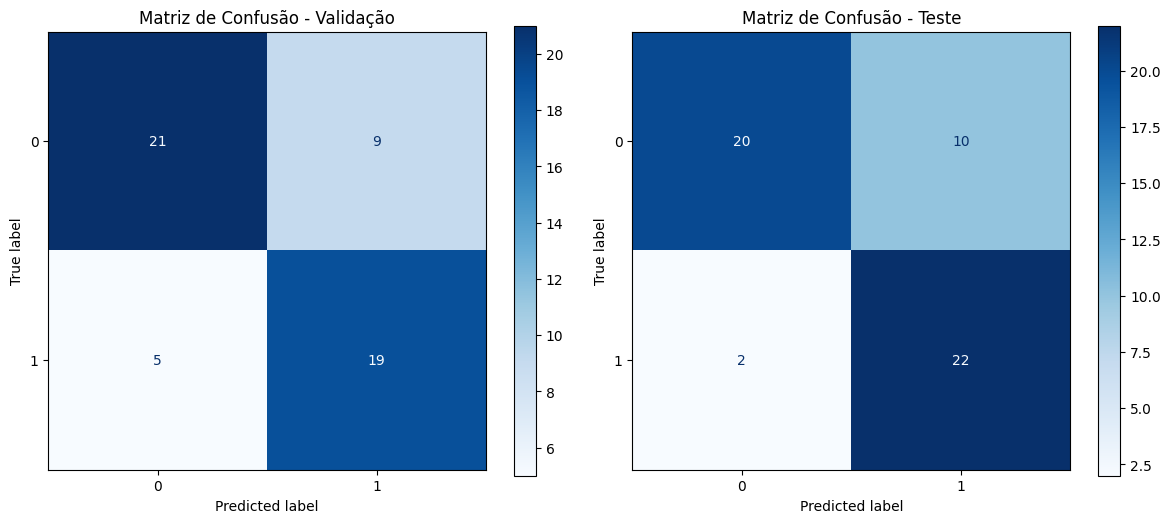

In [9]:
# Predições
y_val_pred = mlp.predict(X_val)
y_test_pred = mlp.predict(X_test)

# Avaliação no conjunto de validação
print("=== RESULTADOS NO CONJUNTO DE VALIDAÇÃO ===")
print(f"Acurácia: {accuracy_score(y_val, y_val_pred):.4f}")
print("\nRelatório de classificação:")
print(classification_report(y_val, y_val_pred))

# Avaliação no conjunto de teste
print("\n=== RESULTADOS NO CONJUNTO DE TESTE ===")
print(f"Acurácia: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nRelatório de classificação:")
print(classification_report(y_test, y_test_pred))

# Matriz de Confusão
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Validação
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, ax=ax1, cmap='Blues')
ax1.set_title("Matriz de Confusão - Validação")

# Teste
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=ax2, cmap='Blues')
ax2.set_title("Matriz de Confusão - Teste")

plt.tight_layout()
plt.show()
